# **Setup**

In [1]:
print('Installing torchquantum...')
!git clone https://github.com/mit-han-lab/torchquantum.git
%cd /content/torchquantum
!pip install --editable . 1>/dev/null
!pip install matplotlib==3.1.3 1>/dev/null
%matplotlib inline
print('All required packages have been successfully installed!')

Installing torchquantum...
Cloning into 'torchquantum'...
remote: Enumerating objects: 11836, done.
remote: Counting objects: 100% (726/726), done.
remote: Compressing objects: 100% (306/306), done.
remote: Total 11836 (delta 435), reused 685 (delta 405), pack-reused 11110
Receiving objects: 100% (11836/11836), 33.59 MiB | 25.33 MiB/s, done.
Resolving deltas: 100% (6593/6593), done.
/content/torchquantum
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchquantum 0.1.2 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
All required packages have been successfully installed!


In [1]:
import sys
import os
# Add the directory containing your local torchquantum to the Python path
# Assuming you're working in the torchquantum repository
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd())))
import torchquantum as tq
import torchquantum.functional as tqf
import numpy as np
import matplotlib.pyplot as plt
import torch
# Print the path to the torchquantum module being used
print(f"Using torchquantum from: {os.path.dirname(tq.__file__)}")

Using torchquantum from: /home/zhengk5/torchquantum/torchquantum


# **1. TorchQuantum basic operations**

## 1.2 TorchQuantum Operations

tq.QuantumDevice Usage

Method 1 of using quantum gates through torchquantum.functional

In [2]:
q_dev = tq.QuantumDevice(n_wires=1)
q_dev.reset_states(bsz=1)
print(f"all zero state: {q_dev}")
tqf.h(q_dev, wires=0)
print(f"after h gate: {q_dev}")

tqf.rx(q_dev, wires=0, params=[0.3])

print(f"after rx gate: {q_dev}")

all zero state:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[1.+0.j, 0.+0.j]], dtype=complex64)
after h gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[0.70710677+0.j, 0.70710677+0.j]], dtype=complex64)
after rx gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[0.6991667-0.10566872j, 0.6991667-0.10566872j]], dtype=complex64)


all zero state:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[1.+0.j, 0.+0.j]], dtype=complex64)
after h gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[0.70710677+0.j, 0.70710677+0.j]], dtype=complex64)
after rx gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[0.6991667-0.10566872j, 0.6991667-0.10566872j]], dtype=complex64)


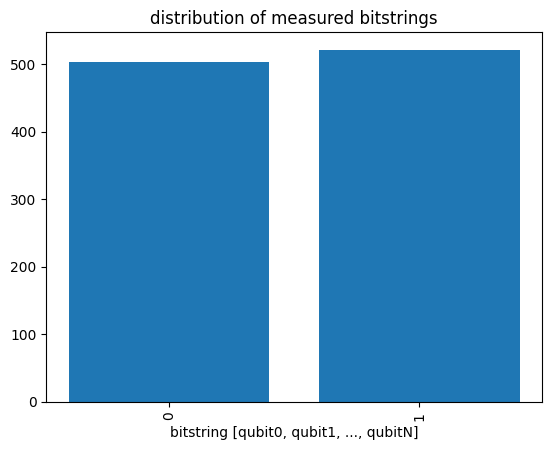

[OrderedDict([('0', 503), ('1', 521)])]


In [3]:
# method 2 of using tq.Operator
q_dev.reset_states(bsz=1)
print(f"all zero state: {q_dev}")

h_gate = tq.h
h_gate(q_dev, wires=0)

print(f"after h gate: {q_dev}")

rx_gate = tq.RX(has_params=True, init_params=[0.3])

rx_gate(q_dev, wires=0)

print(f"after rx gate: {q_dev}")
bitstring = tq.measure(q_dev, n_shots=1024, draw_id=0)

print(bitstring)

In [4]:
# tq.QuantumState to prepare a EPR pair

# q_state = tq.QuantumState(n_wires=2)
q_state = tq.QuantumDevice(n_wires=2, bsz=1, device="cpu")
q_state.h(wires=0)
q_state.cnot(wires=[0, 1])

print(q_state)
bitstring = tq.measure(q_state, n_shots=1024)
print(bitstring)


 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[0.70710677+0.j, 0.        +0.j, 0.        +0.j, 0.70710677+0.j]],
      dtype=complex64)
[OrderedDict([('00', 529), ('01', 0), ('10', 0), ('11', 495)])]


In [5]:
# tq.QuantumState
# q_state = tq.QuantumState(n_wires=3)
q_state = tq.QuantumDevice(n_wires=3, bsz=1, device="cpu")
q_state.x(wires=1)
q_state.rx(wires=2, params=0.6 * np.pi)
print(q_state)

q_state.ry(wires=0, params=0.3 * np.pi)

q_state.qubitunitary(wires=1, params=[[0, 1j], [-1j, 0]])

q_state.cnot(wires=[0, 1])

print(q_state)
bitstring = tq.measure(q_state, n_shots=1024)

print(bitstring)

 class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[0.        +0.j      , 0.        +0.j      , 0.58778524+0.j      ,
        0.        -0.809017j, 0.        +0.j      , 0.        +0.j      ,
        0.        +0.j      , 0.        +0.j      ]], dtype=complex64)
 class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[0.        +0.5237205j , 0.72083944+0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.26684892j, 0.36728606+0.j        ]], dtype=complex64)
[OrderedDict([('000', 292), ('001', 519), ('010', 0), ('011', 0), ('100', 0), ('101', 0), ('110', 62), ('111', 151)])]


Batch mode process different states

In [6]:
# batch mode processing

# q_state = tq.QuantumState(n_wires=3, bsz=64)
q_state = tq.QuantumDevice(n_wires=3, bsz=64, device="cpu")
q_state.x(wires=1)
q_state.rx(wires=2, params=0.6 * np.pi)
print(q_state)


 class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 64 
 current computing device: cpu 
 recording op history: False 
 current states: array([[0.        +0.j      , 0.        +0.j      , 0.58778524+0.j      ,
        0.        -0.809017j, 0.        +0.j      , 0.        +0.j      ,
        0.        +0.j      , 0.        +0.j      ],
       [0.        +0.j      , 0.        +0.j      , 0.58778524+0.j      ,
        0.        -0.809017j, 0.        +0.j      , 0.        +0.j      ,
        0.        +0.j      , 0.        +0.j      ],
       [0.        +0.j      , 0.        +0.j      , 0.58778524+0.j      ,
        0.        -0.809017j, 0.        +0.j      , 0.        +0.j      ,
        0.        +0.j      , 0.        +0.j      ],
       [0.        +0.j      , 0.        +0.j      , 0.58778524+0.j      ,
        0.        -0.809017j, 0.        +0.j      , 0.        +0.j      ,
        0.        +0.j      , 0.        +0.j      ],
       [0.        +0.j      , 0.

In [7]:
# q_state = tq.QuantumState(n_wires=2)
q_state = tq.QuantumDevice(n_wires=2, bsz=1, device="cpu")
print(q_state)
# q_state.set_states(torch.tensor([[0, 0, 1, 0], [0, 1, 0, 0]]))
q_state.set_states(torch.tensor([[0, 0, 1, 0], [0, 1, 0, 0]], dtype=torch.complex64))
print(q_state)

q_state.x(wires=0)
print(q_state)

 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]], dtype=complex64)
 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]], dtype=complex64)
 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]], dtype=complex64)


In [8]:
# demonstrate the GPU processing

n_qubits = 10
bsz = 8
run_iters = 5
use_gpu = True

# q_state = tq.QuantumState(n_wires=n_qubits, bsz=bsz)
q_state = tq.QuantumDevice(n_wires=n_qubits, bsz=bsz)
if use_gpu:
    q_state.to(torch.device('cuda'))

# start = time.time()

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()
for k in range(run_iters):
    print(k)
    for qid in range(n_qubits):
        q_state.rx(qid, params=np.random.rand())
        q_state.cnot(wires=[qid, (qid+1) % n_qubits])
end.record()

torch.cuda.synchronize()

print(f"Use GPU: {use_gpu}, avg runtime for circuit with {n_qubits} qubits, {2*n_qubits} gates, {bsz} batch size is {start.elapsed_time(end) / run_iters / 1000:.2f} second")



0
1
2
3
4
Use GPU: True, avg runtime for circuit with 10 qubits, 20 gates, 8 batch size is 0.01 second


In [9]:
# automatic gradient computation
# q_state = tq.QuantumState(n_wires=2)
q_state = tq.QuantumDevice(n_wires=2, bsz=1, device="cpu")
q_state._states.requires_grad = True

q_state.x(wires=0)
q_state.rx(wires=1, params=0.6 * np.pi)
print(q_state)
target_quantum_state = torch.tensor([0, 0, 0, 1], dtype=torch.complex64)
loss = 1 - (q_state.get_states_1d()[0] @ target_quantum_state).abs()

print(loss)

loss.backward()

print(q_state._states.grad)


 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[0.        +0.j      , 0.        +0.j      , 0.58778524+0.j      ,
        0.        -0.809017j]], dtype=complex64)
tensor(0.1910, grad_fn=<RsubBackward1>)
tensor([[[-0.8090+0.0000j,  0.0000+0.5878j],
         [ 0.0000+0.0000j,  0.0000+0.0000j]]])


In [ ]:
# build a circuit

class QModel(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 2
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)
        self.random_layer = tq.RandomLayer(n_ops=10,
                                           wires=list(range(self.n_wires)))

    def forward(self, q_device: tq.QuantumDevice):
        self.u3_0(q_device, wires=0)
        self.u3_1(q_device, wires=1)
        self.cu3_0(q_device, wires=[0, 1])
        self.u3_2(q_device, wires=0)
        self.u3_3(q_device, wires=1)
        self.cu3_1(q_device, wires=[1, 0])
        self.random_layer(q_device)


q_dev = tq.QuantumDevice(n_wires=2)
q_dev.reset_states(bsz=3)
print(q_dev)

model = QModel()
model(q_dev)
print(q_dev)

 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]], dtype=complex64)
 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[ 0.03304031+0.4019523j ,  0.37612408+0.54211193j,
        -0.28006765+0.38028422j, -0.34794596-0.24055696j],
       [ 0.03304031+0.4019523j ,  0.37612408+0.54211193j,
        -0.28006765+0.38028422j, -0.34794596-0.24055696j],
       [ 0.03304031+0.4019523j ,  0.37612408+0.54211193j,
        -0.28006765+0.38028422j, -0.34794596-0.24055696j]],
      dtype=complex64)


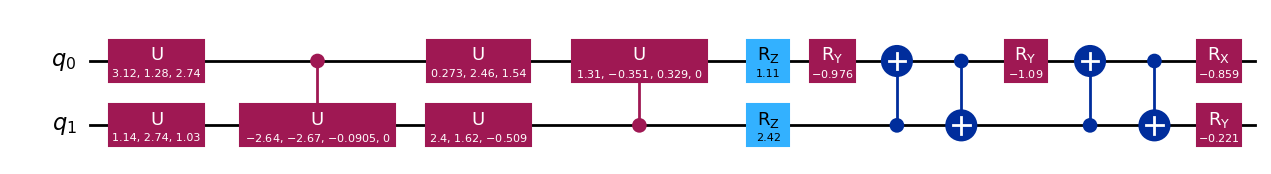

In [11]:
# easy conversion to qiskit
from torchquantum.plugin.qiskit.qiskit_plugin import tq2qiskit

circ = tq2qiskit(q_dev, model)
circ.draw('mpl')

In [ ]:
# 

In [12]:
# easy deployment on real quantum machine
from torchquantum.plugin.qiskit.qiskit_plugin import tq2qiskit
from torchquantum.plugin.qiskit.qiskit_processor import QiskitProcessor


processor = QiskitProcessor(use_real_qc=False, ibm_quantum_token='56c59028c454571ffabe46350270b3c21aab39072ea933dddc8836de91d0d15b00b20c7082b86fd3dd0f210ead79d6341d16807493b6cd19a209f3f19b66b64b', max_jobs=1)
circ = tq2qiskit(q_dev, model)
circ.measure_all()

res = processor.process_ready_circs(q_dev, [circ])

# this is the expectation value
print(res)


[2025-04-29 21:09:35.310] No noise model specified or fetched.
[2025-04-29 21:09:35.311] Initialized AerSamplerV2.
[2025-04-29 21:09:35.313] Transpiling 1 circuits...
[2025-04-29 21:09:35.393] Transpilation complete.
[2025-04-29 21:09:35.393] Processing 1 pubs sequentially.


tensor([[ 0.2224, -0.2390]])


In [ ]:
# speedup comparison with Qiskit


In [14]:
! pip install pennylane

  Using cached autograd-1.7.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached tomlkit-0.13.2-py3-none-any.whl.metadata (2.7 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.7 MB/s eta 0:00:00
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached autograd-1.7.0-py3-none-any.whl (52 kB)
Using cached tomlkit-0.13.2-py3-none-any.whl (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 77.9 MB/s eta 0:00:00


In [13]:
# Speed comparison with pennylane

import pennylane as qml
from pennylane import numpy as np
import random
import time 


In [14]:
n_wires = 10
bsz = 32
use_gpu=False

In [15]:
dev=qml.device("default.qubit",wires=n_wires)

@qml.qnode(dev,interface="torch")
def pennylane_circ(params):
    qml.Rot(params[0],params[1],params[2],wires=0)
    qml.Rot(params[3],params[4],params[5],wires=1)
    qml.ctrl(qml.Rot,control=0)(params[6],params[7],params[8],wires=1)
    qml.Rot(params[9],params[10],params[11],wires=0)
    qml.Rot(params[12],params[13],params[14],wires=1)  
    qml.ctrl(qml.Rot,control=1)(params[15],params[16],params[17],wires=0)
    return qml.state()



if use_gpu:
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

params=np.zeros(18)

reps = 20
start = time.time()
for _ in range(reps):
  for k in range(bsz):
    pennylane_circ(params)

end = time.time()
pennylane_time = (end-start)/reps
print(f"Pennylane inference time: {pennylane_time}")


/home/zhengk5/miniconda3/envs/tqupgrade/lib/python3.10/site-packages/pennylane/math/interface_utils.py:136: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


Pennylane inference time: 0.11360660791397095


In [16]:
reps = 1000
'''
Circuit definition in torchquantum
'''
class QModel(tq.QuantumModule):
    def __init__(self, bsz, n_wires):
        super().__init__()
        self.bsz = bsz
        self.n_wires = n_wires
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)
        
    def forward(self, q_device: tq.QuantumDevice):
        q_device.reset_states(self.bsz)
        self.u3_0(q_device, wires=0)
        self.u3_1(q_device, wires=1)
        self.cu3_0(q_device, wires=[0, 1])
        self.u3_2(q_device, wires=0)
        self.u3_3(q_device, wires=1)
        self.cu3_1(q_device, wires=[1, 0])

tq_circ = QModel(n_wires=n_wires, bsz=bsz).to(device)
q_device = tq.QuantumDevice(n_wires=n_wires)


start = time.time()
for _ in range(reps):
  tq_circ(q_device)

end = time.time()
tq_time = (end-start)/reps

print(f"TorchQuantum inference time {tq_time}; is {pennylane_time/tq_time} X faster")

TorchQuantum inference time 0.002723586559295654; is 41.7121341439395 X faster


In [17]:
# basic pulse
pulse = tq.QuantumPulseDirect(n_steps=4,
                                  hamil=[[0, 1], [1, 0]])
pulse.get_unitary()


tensor([[-0.6536+0.0000j,  0.0000+0.7568j],
        [ 0.0000+0.7568j, -0.6536+0.0000j]], grad_fn=<MmBackward0>)

In [18]:
theta = 0.6 * np.pi
target_unitary = torch.tensor([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]], dtype=torch.complex64)
loss = 1 - (torch.trace(pulse.get_unitary() @ target_unitary) / target_unitary.shape[0]).abs() ** 2
loss.backward()
print(pulse.pulse_shape.grad)


tensor([-0.4441, -0.4441, -0.4441, -0.4441])


## 1.3 TorchQuantum for state preparation circuit

In [19]:
import torch
import torch.optim as optim
import argparse

import torchquantum as tq
from torch.optim.lr_scheduler import CosineAnnealingLR

import random
import numpy as np

In [20]:

class QModel(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 2
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)

    def forward(self, q_state: tq.QuantumDevice):
        q_state.reset_states(1)
        self.u3_0(q_state, wires=0)
        self.u3_1(q_state, wires=1)
        self.cu3_0(q_state, wires=[0, 1])
        self.u3_2(q_state, wires=0)
        self.u3_3(q_state, wires=1)
        self.cu3_1(q_state, wires=[1, 0])

def train(target_state, state, model, optimizer):
    model(state)
    result_state = state.get_states_1d()[0]

    # compute the state infidelity
    loss = 1 - torch.dot(result_state, target_state).abs() ** 2

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"infidelity (loss): {loss.item()}, \n target state : "
          f"{target_state.detach().cpu().numpy()}, \n "
          f"result state : {result_state.detach().cpu().numpy()}\n")

In [21]:
def main(n_epochs=3000):
    seed = 42
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    model = QModel().to(device)

    optimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=0)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    q_device = tq.QuantumDevice(n_wires=2, device=device)
    target_state = torch.tensor([0, 1, 0, 0], dtype=torch.complex64, device=device)

    for epoch in range(1, n_epochs + 1):
        print(f"Epoch {epoch}, LR: {optimizer.param_groups[0]['lr']}")
        train(target_state, q_device, model, optimizer)
        scheduler.step()

In [27]:
main(n_epochs=3000)

Epoch 1, LR: 0.01
infidelity (loss): 0.9505876898765564, 
 target state : [0.+0.j 1.+0.j 0.+0.j 0.+0.j], 
 result state : [-0.3808177 -0.00160371j -0.088515  +0.20390542j  0.27950755+0.10645151j
  0.19007617+0.82460755j]

Epoch 2, LR: 0.009999997258443473
infidelity (loss): 0.9399973154067993, 
 target state : [0.+0.j 1.+0.j 0.+0.j 0.+0.j], 
 result state : [-0.3777624 -0.01029787j -0.10236481+0.22254011j  0.28103673+0.10536388j
  0.17618033+0.82223123j]

Epoch 3, LR: 0.009999989033776897
infidelity (loss): 0.9284378290176392, 
 target state : [0.+0.j 1.+0.j 0.+0.j 0.+0.j], 
 result state : [-0.374541  -0.01894524j -0.11530997+0.2413831j   0.28263515+0.10402667j
  0.16364563+0.81872714j]

Epoch 4, LR: 0.009999975326009292
infidelity (loss): 0.9159607291221619, 
 target state : [0.+0.j 1.+0.j 0.+0.j 0.+0.j], 
 result state : [-0.37116212-0.02754209j -0.12835282+0.2599323j   0.28429654+0.10243265j
  0.14889082+0.81483465j]

Epoch 5, LR: 0.009999956135155688
infidelity (loss): 0.902623951

## 1.4 TorchQuantum for VQE circuit 

In [22]:
! wget https://www.dropbox.com/s/1rtttfxoo02s09e/h2_new.txt

--2025-04-29 21:10:15--  https://www.dropbox.com/s/1rtttfxoo02s09e/h2_new.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/5hfv3opi7nb0toxzhohaz/h2_new.txt?rlkey=2r8t0enh6s8zsev5uj15qsy32 [following]
--2025-04-29 21:10:16--  https://www.dropbox.com/scl/fi/5hfv3opi7nb0toxzhohaz/h2_new.txt?rlkey=2r8t0enh6s8zsev5uj15qsy32
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘h2_new.txt’

h2_new.txt              [ <=>                ] 155.39K  --.-KB/s    in 0.1s    

2025-04-29 21:10:16 (1.04 MB/s) - ‘h2_new.txt’ saved [159124]



In [40]:
import torchquantum as tq
import torch
import torch.nn.functional as F
from torchquantum.util.vqe_utils import parse_hamiltonian_file
from torchquantum.dataset import VQE
import random
import numpy as np
import argparse
import torch.optim as optim

from torch.optim.lr_scheduler import CosineAnnealingLR, ConstantLR



In [41]:
class QVQEModel(tq.QuantumModule):
    def __init__(self, arch, hamil_info):
        super().__init__()
        self.arch = arch
        self.hamil_info = hamil_info
        self.n_wires = hamil_info['n_wires']
        self.n_blocks = arch['n_blocks']
        self.u3_layers = tq.QuantumModuleList()
        self.cu3_layers = tq.QuantumModuleList()
        for _ in range(self.n_blocks):
            self.u3_layers.append(tq.Op1QAllLayer(op=tq.U3,
                                                  n_wires=self.n_wires,
                                                  has_params=True,
                                                  trainable=True,
                                                  ))
            self.cu3_layers.append(tq.Op2QAllLayer(op=tq.CU3,
                                                   n_wires=self.n_wires,
                                                   has_params=True,
                                                   trainable=True,
                                                   circular=True
                                                   ))
        self.measure = tq.MeasureMultipleTimes(
            obs_list=hamil_info['hamil_list'])

    def forward(self, q_device):
        q_device.reset_states(bsz=1)
        for k in range(self.n_blocks):
            self.u3_layers[k](q_device)
            self.cu3_layers[k](q_device)
        x = self.measure(q_device)

        hamil_coefficients = torch.tensor([hamil['coefficient'] for hamil in
                                           self.hamil_info['hamil_list']],
                                          device=x.device).double()

        for k, hamil in enumerate(self.hamil_info['hamil_list']):
            for wire, observable in zip(hamil['wires'], hamil['observables']):
                if observable == 'i':
                    x[k][wire] = 1
            for wire in range(q_device.n_wires):
                if wire not in hamil['wires']:
                    x[k][wire] = 1

        x = torch.cumprod(x, dim=-1)[:, -1].double()
        x = torch.dot(x, hamil_coefficients)

        if x.dim() == 0:
            x = x.unsqueeze(0)

        return x


def train(dataflow, q_device, model, device, optimizer):
    for _ in dataflow['train']:
        outputs = model(q_device)
        loss = outputs.mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"Expectation of energy: {loss.item()}")


def valid_test(dataflow, q_device, split, model, device):
    with torch.no_grad():
        for _ in dataflow[split]:
            outputs = model(q_device)
    loss = outputs.mean()

    print(f"Expectation of energy: {loss}")


In [42]:
class Args(object):
  def __init__(self):
    pass

def main():
    # parser = argparse.ArgumentParser()
    # parser.add_argument('--pdb', action='store_true', help='debug with pdb')
    # parser.add_argument('--n_blocks', type=int, default=2,
    #                     help='number of blocks, each contain one layer of '
    #                          'U3 gates and one layer of CU3 with '
    #                          'ring connections')
    # parser.add_argument('--steps_per_epoch', type=int, default=10,
    #                     help='number of training epochs')
    # parser.add_argument('--epochs', type=int, default=100,
    #                     help='number of training epochs')
    # parser.add_argument('--hamil_filename', type=str, default='./h2_new.txt',
    #                     help='number of training epochs')

    args = Args()
    args.n_blocks = 2
    args.steps_per_epoch=100
    args.epochs=100
    args.hamil_filename = 'h2_new.txt'

    # if args.pdb:
    #     import pdb
    #     pdb.set_trace()

    seed = 0
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    dataset = VQE(steps_per_epoch=args.steps_per_epoch)

    dataflow = dict()

    for split in dataset:
        if split == 'train':
            sampler = torch.utils.data.RandomSampler(dataset[split])
        else:
            sampler = torch.utils.data.SequentialSampler(dataset[split])
        dataflow[split] = torch.utils.data.DataLoader(
            dataset[split],
            batch_size=1,
            sampler=sampler,
            num_workers=1,
            pin_memory=True)

    hamil_info = parse_hamiltonian_file(args.hamil_filename)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    model = QVQEModel(arch={"n_blocks": args.n_blocks},
                       hamil_info=hamil_info)

    model.to(device)

    n_epochs = args.epochs
    optimizer = optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    q_device = tq.QuantumDevice(n_wires=hamil_info['n_wires'])
    q_device.reset_states(bsz=1)

    for epoch in range(1, n_epochs + 1):
        # train
        print(f"Epoch {epoch}, LR: {optimizer.param_groups[0]['lr']}")
        train(dataflow, q_device, model, device, optimizer)

        # valid
        valid_test(dataflow, q_device, 'valid', model, device)
        scheduler.step()

    # final valid
    valid_test(dataflow, q_device, 'valid', model, device)

In [43]:
main()

Epoch 1, LR: 0.005
Expectation of energy: -0.3082973230728011
Expectation of energy: -0.3150707638089269
Expectation of energy: -0.32225806677983054
Expectation of energy: -0.32985389654800246
Expectation of energy: -0.3378548957310795
Expectation of energy: -0.3462579786169898
Expectation of energy: -0.3550608077597749
Expectation of energy: -0.3642612311998784
Expectation of energy: -0.37385944329722354
Expectation of energy: -0.3838581392187024
Expectation of energy: -0.3942625904653395
Expectation of energy: -0.4050825282943114
Expectation of energy: -0.41632978112054325
Expectation of energy: -0.42802158732468754
Expectation of energy: -0.44017898427901825
Expectation of energy: -0.45282500048685337
Expectation of energy: -0.4659814111187496
Expectation of energy: -0.47966704588196407
Expectation of energy: -0.49389359348281064
Expectation of energy: -0.5086673941322084
Expectation of energy: -0.5239895214774657
Expectation of energy: -0.5398576807415613
Expectation of energy: -0.

## 1.5 TorchQuantum for QNN circuit

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import argparse
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd())))
import torchquantum as tq
import torchquantum.functional as tqf
from torchquantum.plugin.qiskit.qiskit_processor import QiskitProcessor
from torchquantum.plugin import (tq2qiskit_expand_params,
                                  tq2qiskit,
                                  tq2qiskit_measurement,
                                  qiskit_assemble_circs,
                                  qiskit2tq)
from torchquantum.util import (build_module_from_op_list,
                                build_module_op_list,
                                get_v_c_reg_mapping,
                                get_p_c_reg_mapping,
                                get_p_v_reg_mapping,
                                get_cared_configs)
from torchquantum.dataset import MNIST
from torch.optim.lr_scheduler import CosineAnnealingLR

import random
import numpy as np
print(f"Using torchquantum from: {os.path.dirname(tq.__file__)}")

Using torchquantum from: /home/zhengk5/torchquantum/torchquantum


In [2]:
class QFCModel(tq.QuantumModule):
    class QLayer(tq.QuantumModule):
        def __init__(self):
            super().__init__()
            self.n_wires = 4
            self.random_layer = tq.RandomLayer(n_ops=50,
                                               wires=list(range(self.n_wires)))

            # gates with trainable parameters
            self.rx0 = tq.RX(has_params=True, trainable=True)
            self.ry0 = tq.RY(has_params=True, trainable=True)
            self.rz0 = tq.RZ(has_params=True, trainable=True)
            self.crx0 = tq.CRX(has_params=True, trainable=True)

        @tq.static_support
        def forward(self, q_device: tq.QuantumDevice):
            """
            1. To convert tq QuantumModule to qiskit or run in the static
            model, need to:
                (1) add @tq.static_support before the forward
                (2) make sure to add
                    static=self.static_mode and
                    parent_graph=self.graph
                    to all the tqf functions, such as tqf.hadamard below
            """
            self.q_device = q_device

            self.random_layer(self.q_device)

            # some trainable gates (instantiated ahead of time)
            self.rx0(self.q_device, wires=0)
            self.ry0(self.q_device, wires=1)
            self.rz0(self.q_device, wires=3)
            self.crx0(self.q_device, wires=[0, 2])

            # add some more non-parameterized gates (add on-the-fly)
            tqf.hadamard(self.q_device, wires=3, static=self.static_mode,
                         parent_graph=self.graph)
            tqf.sx(self.q_device, wires=2, static=self.static_mode,
                   parent_graph=self.graph)
            tqf.cnot(self.q_device, wires=[3, 0], static=self.static_mode,
                     parent_graph=self.graph)
            tqf.rx(self.q_device, wires=1, params=torch.tensor([0.1]),
                   static=self.static_mode, parent_graph=self.graph)

    def __init__(self):
        super().__init__()
        self.n_wires = 4
        self.q_device = tq.QuantumDevice(n_wires=self.n_wires)
        self.encoder = tq.GeneralEncoder(
            tq.encoder_op_list_name_dict['4x4_ryzxy'])

        self.q_layer = self.QLayer()
        self.measure = tq.MeasureAll(tq.PauliZ)

    def forward(self, x, use_qiskit=False):
        bsz = x.shape[0]
        x = F.avg_pool2d(x, 6).view(bsz, 16)
        devi = x.device

        if use_qiskit:
            encoder_circs = tq2qiskit_expand_params(self.q_device, x,
                                                    self.encoder.func_list)
            q_layer_circ = tq2qiskit(self.q_device, self.q_layer)
            measurement_circ = tq2qiskit_measurement(self.q_device,
                                                     self.measure)
            assembled_circs = qiskit_assemble_circs(encoder_circs,
                                                    q_layer_circ,
                                                    measurement_circ)
            x0 = self.qiskit_processor.process_ready_circs(
                self.q_device, assembled_circs).to(devi)
            # x1 = self.qiskit_processor.process_parameterized(
            #     self.q_device, self.encoder, self.q_layer, self.measure, x)
            # print((x0-x1).max())
            x = x0

        else:
            q_device = tq.QuantumDevice(n_wires=self.n_wires, bsz=bsz, device=devi)
            self.encoder(q_device, x)
            self.q_layer(q_device)
            x = self.measure(q_device)

        x = x.reshape(bsz, 2, 2).sum(-1).squeeze()
        x = F.log_softmax(x, dim=1)

        return x


def train(dataflow, model, device, optimizer):
    for feed_dict in dataflow['train']:
        inputs = feed_dict['image'].to(device)
        targets = feed_dict['digit'].to(device)

        outputs = model(inputs)
        loss = F.nll_loss(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"loss: {loss.item()}", end='\r')


def valid_test(dataflow, split, model, device, qiskit=False):
    target_all = []
    output_all = []
    with torch.no_grad():
        for feed_dict in dataflow[split]:
            inputs = feed_dict['image'].to(device)
            targets = feed_dict['digit'].to(device)

            outputs = model(inputs, use_qiskit=qiskit)

            target_all.append(targets)
            output_all.append(outputs)
        target_all = torch.cat(target_all, dim=0)
        output_all = torch.cat(output_all, dim=0)

    _, indices = output_all.topk(1, dim=1)
    masks = indices.eq(target_all.view(-1, 1).expand_as(indices))
    size = target_all.shape[0]
    corrects = masks.sum().item()
    accuracy = corrects / size
    loss = F.nll_loss(output_all, target_all).item()

    print(f"{split} set accuracy: {accuracy}")
    print(f"{split} set loss: {loss}")


In [3]:

def main():
    # parser = argparse.ArgumentParser()
    # parser.add_argument('--static', action='store_true', help='compute with '
    #                                                           'static mode')
    # parser.add_argument('--pdb', action='store_true', help='debug with pdb')
    # parser.add_argument('--wires-per-block', type=int, default=2,
    #                     help='wires per block int static mode')
    # parser.add_argument('--epochs', type=int, default=5,
    #                     help='number of training epochs')

    # args = parser.parse_args()

    # if args.pdb:
        # import pdb
        # pdb.set_trace()

    n_epochs = 5
    seed = 0
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    dataset = MNIST(
        root='./mnist_data',
        train_valid_split_ratio=[0.9, 0.1],
        digits_of_interest=[3, 6],
        n_test_samples=75,
    )
    dataflow = dict()

    for split in dataset:
        sampler = torch.utils.data.RandomSampler(dataset[split])
        dataflow[split] = torch.utils.data.DataLoader(
            dataset[split],
            batch_size=256,
            sampler=sampler,
            num_workers=8,
            pin_memory=True)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    model = QFCModel().to(device)

    



    optimizer = optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    for epoch in range(1, n_epochs + 1):
        # train
        print(f"Epoch {epoch}:")
        train(dataflow, model, device, optimizer)
        print(optimizer.param_groups[0]['lr'])

        # valid
        valid_test(dataflow, 'valid', model, device)
        scheduler.step()

    # test
    valid_test(dataflow, 'test', model, device, qiskit=False)

    # run on Qiskit simulator and real Quantum Computers
    try:
        
        # from torchquantum.plugin.qiskit.qiskit_processor import QiskitProcessor

        # firstly perform simulate
        print(f"\nTest with Qiskit Simulator")
        processor_simulation = QiskitProcessor(use_real_qc=False, ibm_quantum_token='56c59028c454571ffabe46350270b3c21aab39072ea933dddc8836de91d0d15b00b20c7082b86fd3dd0f210ead79d6341d16807493b6cd19a209f3f19b66b64b')
        model.set_qiskit_processor(processor_simulation)
        valid_test(dataflow, 'test', model, device, qiskit=True)

        """
        # then try to run on REAL QC
        backend_name = 'ibm_rensselaer'
        print(f"\nTest on Real Quantum Computer {backend_name}")
        # Please specify your own hub group and project if you have the
        # IBMQ premium plan to access more machines.
        processor_real_qc = QiskitProcessor(use_real_qc=True,
                                            backend_name=backend_name,
                                            ibm_quantum_token='56c59028c454571ffabe46350270b3c21aab39072ea933dddc8836de91d0d15b00b20c7082b86fd3dd0f210ead79d6341d16807493b6cd19a209f3f19b66b64b'
                                            )
        model.set_qiskit_processor(processor_real_qc)
        valid_test(dataflow, 'test', model, device, qiskit=True)
        """
    except ImportError:
        print("Please install qiskit, create an IBM Q Experience Account and "
              "save the account token according to the instruction at "
              "'https://github.com/Qiskit/qiskit-ibmq-provider', "
              "then try again.")

In [4]:
main()

[2025-05-05 21:42:46.036] Only use the front 75 images as TEST set.


Epoch 1:
0.005 0.6606056690216064
valid set accuracy: 0.700414937759336
valid set loss: 0.6310521960258484
Epoch 2:
0.0045225424859373685078
valid set accuracy: 0.7593360995850622
valid set loss: 0.5886884927749634
Epoch 3:
0.0032725424859373683985
valid set accuracy: 0.7800829875518672
valid set loss: 0.5687925815582275
Epoch 4:
0.0017274575140626314423
valid set accuracy: 0.7908713692946058
valid set loss: 0.5576300621032715
Epoch 5:
0.0004774575140626316012
valid set accuracy: 0.7883817427385892
valid set loss: 0.5545857548713684


[2025-05-05 21:42:58.775] No noise model specified or fetched.
[2025-05-05 21:42:58.776] Initialized AerSamplerV2.


test set accuracy: 0.8266666666666667
test set loss: 0.5510899424552917

Test with Qiskit Simulator


[2025-05-05 21:42:58.960] Transpiling 75 circuits...
[2025-05-05 21:42:59.961] Transpilation complete.
[2025-05-05 21:42:59.962] Processing 75 pubs in 5 chunks using 5 workers.


test set accuracy: 0.8266666666666667
test set loss: 0.5513302683830261
